In [22]:
import pandas as pd

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv(r"E:\CHEHEB\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [27]:
df = pd.get_dummies(df, columns=["Gender"])
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [28]:
df["Gender_Female"]=df["Gender_Female"].astype("int")
df["Gender_Male"]=df["Gender_Male"].astype("int")

In [31]:
scaler = StandardScaler()
df[["Age","Annual Income (k$)","Spending Score (1-100)"]] = scaler.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [32]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,-1.424569,-1.738999,-0.434801,0,1
1,2,-1.281035,-1.738999,1.195704,0,1
2,3,-1.352802,-1.700830,-1.715913,1,0
3,4,-1.137502,-1.700830,1.040418,1,0
4,5,-0.563369,-1.662660,-0.395980,1,0
...,...,...,...,...,...,...
195,196,-0.276302,2.268791,1.118061,1,0
196,197,0.441365,2.497807,-0.861839,1,0
197,198,-0.491602,2.497807,0.923953,0,1
198,199,-0.491602,2.917671,-1.250054,0,1


# Finding the optimale number of clusters

C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

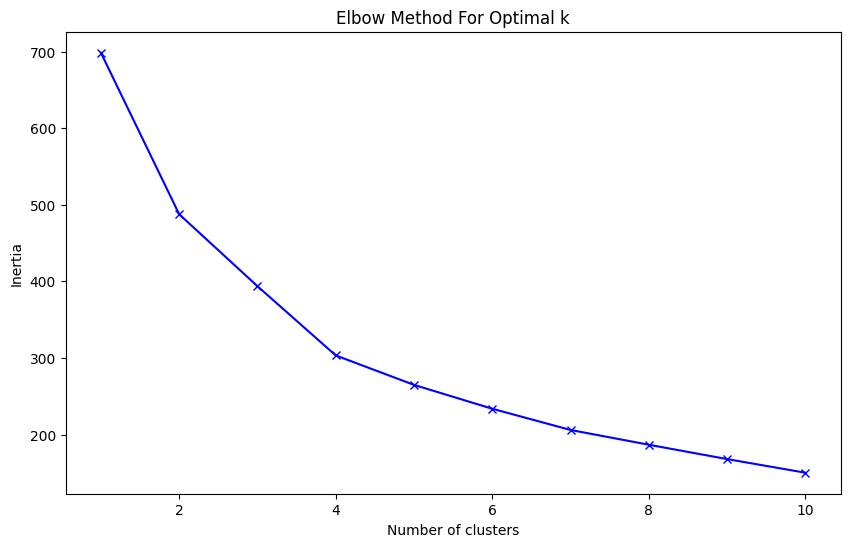

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x=df[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]] 
# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


# modeling

In [34]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(x)
df['Cluster'] = clusters

C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,1,-1.424569,-1.738999,-0.434801,0,1,2
1,2,-1.281035,-1.738999,1.195704,0,1,2
2,3,-1.352802,-1.700830,-1.715913,1,0,2
3,4,-1.137502,-1.700830,1.040418,1,0,2
4,5,-0.563369,-1.662660,-0.395980,1,0,2
...,...,...,...,...,...,...,...
195,196,-0.276302,2.268791,1.118061,1,0,1
196,197,0.441365,2.497807,-0.861839,1,0,3
197,198,-0.491602,2.497807,0.923953,0,1,1
198,199,-0.491602,2.917671,-1.250054,0,1,3


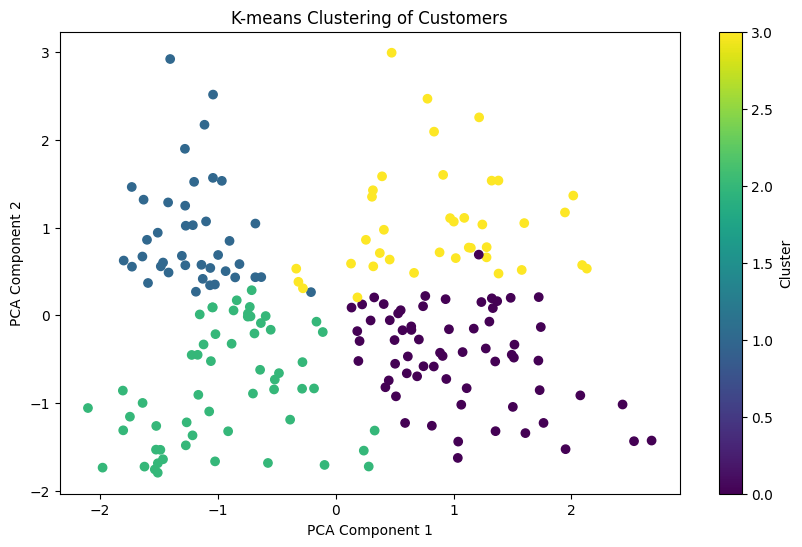

In [40]:
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Customers')
plt.colorbar(label='Cluster')
plt.show()
